In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
sro_30 = "/Users/annek/Downloads/surface_runoff.CARRA.west_domain.forecast.30h.2011.8.grib"
sro_30 = xr.open_dataset(sro_30, engine='cfgrib')
sro_24 = "/Users/annek/Downloads/surface_runoff.CARRA.west_domain.forecast.24h.2011.8.grib"
sro_24 = xr.open_dataset(sro_24, engine='cfgrib')


In [7]:
cleaned_sro_30 = sro_30.reset_coords(drop=True)
cleaned_sro_30

<xarray.Dataset> Size: 168MB
Dimensions:  (time: 31, y: 1269, x: 1069)
Coordinates:
  * time     (time) datetime64[ns] 248B 2011-08-01 2011-08-02 ... 2011-08-31
Dimensions without coordinates: y, x
Data variables:
    sro      (time, y, x) float32 168MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-06-21T16:25 GRIB to CDM+CF via cfgrib-0.9.1...

In [36]:
sro24hr = sro_24.sel(step =  pd.to_timedelta('1 days 00:00:00') ).reset_coords(drop=True)

In [14]:
cleaned_sro_24 = sro_24.reset_coords(drop=True)

In [24]:
diff = cleaned_sro_30 - cleaned_sro_24.isel(step=2).reset_coords(drop=True)

Text(0.5, 1.0, 'Compare 24 hour sum, with and without spinup')

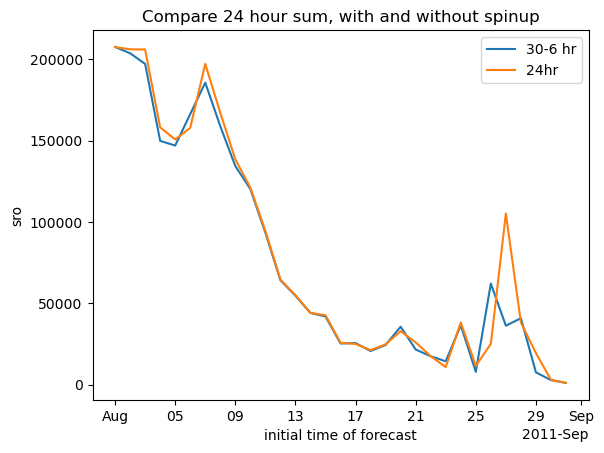

In [43]:
diff.sum(dim=['x', 'y'])['sro'].plot(label='30-6 hr')
sro24hr.sum(dim=['x', 'y'])['sro'].plot(label='24hr')
plt.legend()
plt.title("Compare 24 hour sum, with and without spinup")

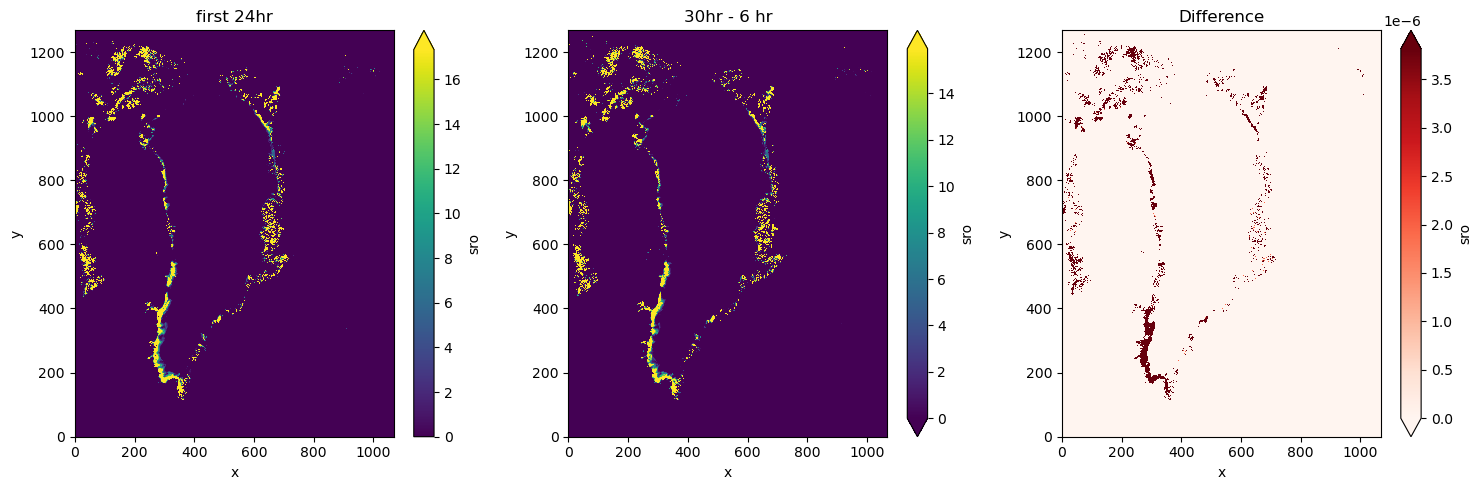

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

diff.sum(dim=['time'])['sro'].plot(robust=True, ax=axs[1])
axs[1].set_title("30hr - 6 hr")
sro24hr.sum(dim=['time'])['sro'].plot(robust=True, ax=axs[0])
axs[0].set_title("first 24hr")
(sro24hr.sum(dim=['time'])['sro']- diff.sum(dim=['time'])['sro']).plot(robust=True, ax=axs[2], cmap = 'Reds')
axs[2].set_title("Difference")
plt.tight_layout()

In [30]:
sro_24.sel(step=pd.to_timedelta('6 hours')).reset_coords(drop=True)

<xarray.Dataset> Size: 168MB
Dimensions:  (time: 31, y: 1269, x: 1069)
Coordinates:
  * time     (time) datetime64[ns] 248B 2011-08-01 2011-08-02 ... 2011-08-31
    step     timedelta64[ns] 8B 06:00:00
Dimensions without coordinates: y, x
Data variables:
    sro      (time, y, x) float32 168MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-06-21T16:32 GRIB to CDM+CF via cfgrib-0.9.1...

# inspect monthly mean 

In [33]:
sro_23_month_mean = "/Users/annek/Downloads/surface_runoff.CARRA.west_domain.Monthly.2023.mean.nc"
ds_sro_23_month_mean = xr.open_dataset(sro_23_month_mean)

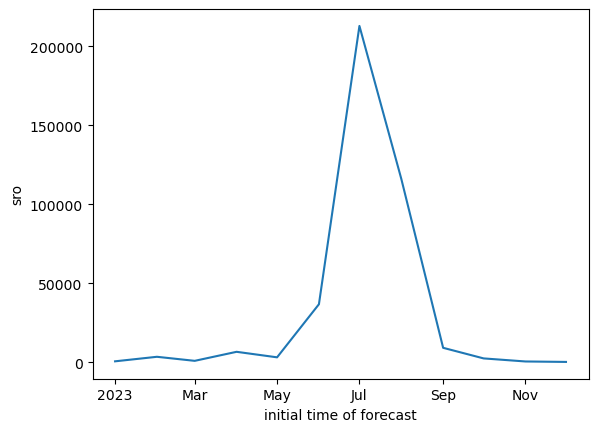

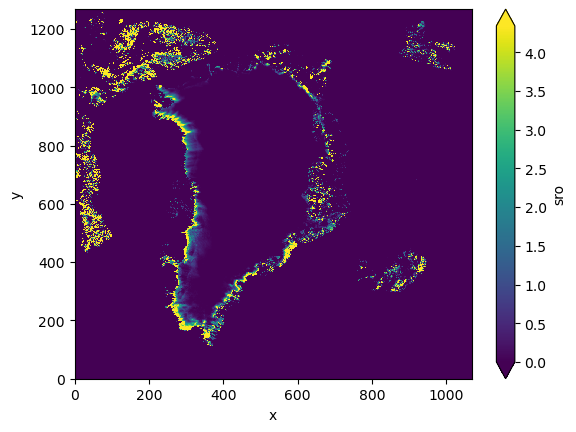

In [56]:
ds_sro_23_month_mean.sum(dim=['x', 'y'])['sro'].plot()
plt.show()
ds_sro_23_month_mean.sum(dim=['time'])['sro'].plot(robust=True)

In [67]:
ds_33_years = xr.open_dataset("/Users/annek/Downloads/surface_runoff.CARRA.west_domain.Monthly.1991-2023.sum.nc")

In [62]:
ds_oneyear = xr.open_dataset("/Users/annek/Downloads/surface_runoff.CARRA.west_domain.Monthly.2023.sum.nc")

In [65]:
files_two_years = ["/Users/annek/Downloads/surface_runoff.CARRA.west_domain.Monthly.2022.sum.nc",
                   "/Users/annek/Downloads/surface_runoff.CARRA.west_domain.Monthly.2023.sum.nc"]
ds_two_years = xr.open_mfdataset(files_two_years)

In [68]:
ds_33_years

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 396, y: 1269, x: 1069)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2023-12-01
Dimensions without coordinates: y, x
Data variables:
    sro      (time, y, x) float32 2GB ...

Sum surface runoff per basin

In [70]:
ds_per_basin_sum = xr.open_dataset("/Users/annek/Downloads/surface_runoff.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin_copy.nc")

In [86]:
import numpy as np
dict_sections = dict(zip(np.arange(1,8),['SE', 'SW', 'CE', 'CW', 'NE', 'NW', 'NO']))
# {1: 'SE', 2: 'SW', 3: 'CE', 4: 'CW', 5: 'NE', 6: 'NW', 7: 'NO'}
# 
df_per_basin_sum = ds_per_basin_sum['sro'].to_dataframe().unstack('section_numbers_adjusted')
df_per_basin_sum.columns = df_per_basin_sum.columns.droplevel(0)
df_per_basin_sum = df_per_basin_sum.rename(columns =dict_sections)

pd.options.plotting.backend = "plotly"
df_per_basin_sum.plot()

In [88]:
ds_masks1 = "/Users/annek/Downloads/masks1k.nc"

In [92]:
ds_masks1 = xr.open_dataset(ds_masks1)

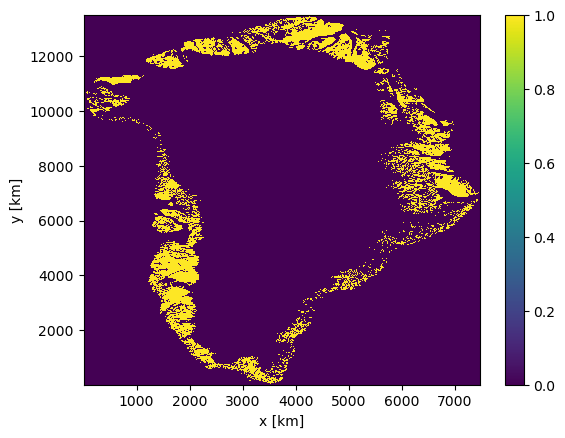

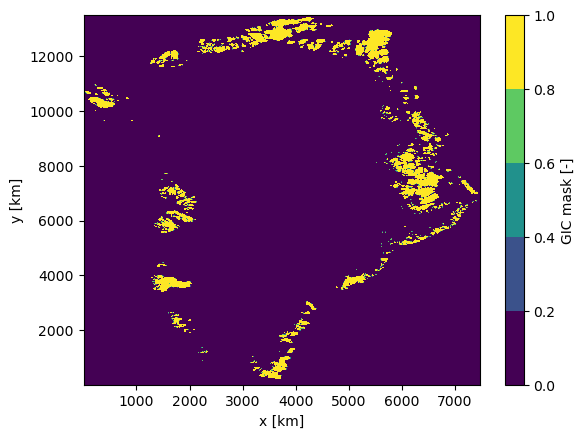

In [119]:
ds_masks1['GIC'].plot.contourf()

In [100]:
file = "/Volumes/imau02/rapid/Anneke/CARRA/Monthly/RACMOgrid/surface_runoff.Tundra.CARRA.west_domain.1991-2023.1km.MM.sum_per_basin.nc"

In [107]:
ds_monthly_sum = xr.open_dataset(file)


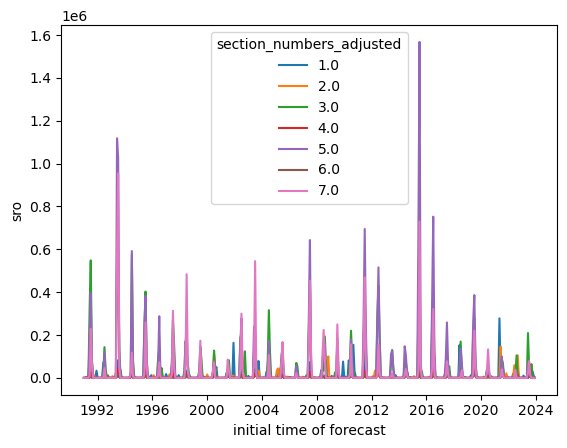

In [106]:
ds['sro'].plot(hue='section_numbers_adjusted')

In [109]:
ds_tundra_sum_YY  = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.Tundra.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin.nc"
ds_GIC_sum_YY = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.GIC.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin.nc"
ds_GrIS_sum_YY = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.GrIS.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin.nc"
ds_GIC_sum_YY = xr.open_dataset(ds_GIC_sum_YY)
ds_tundra_sum_YY = xr.open_dataset(ds_tundra_sum_YY)
ds_GrIS_sum_YY = xr.open_dataset(ds_GrIS_sum_YY)

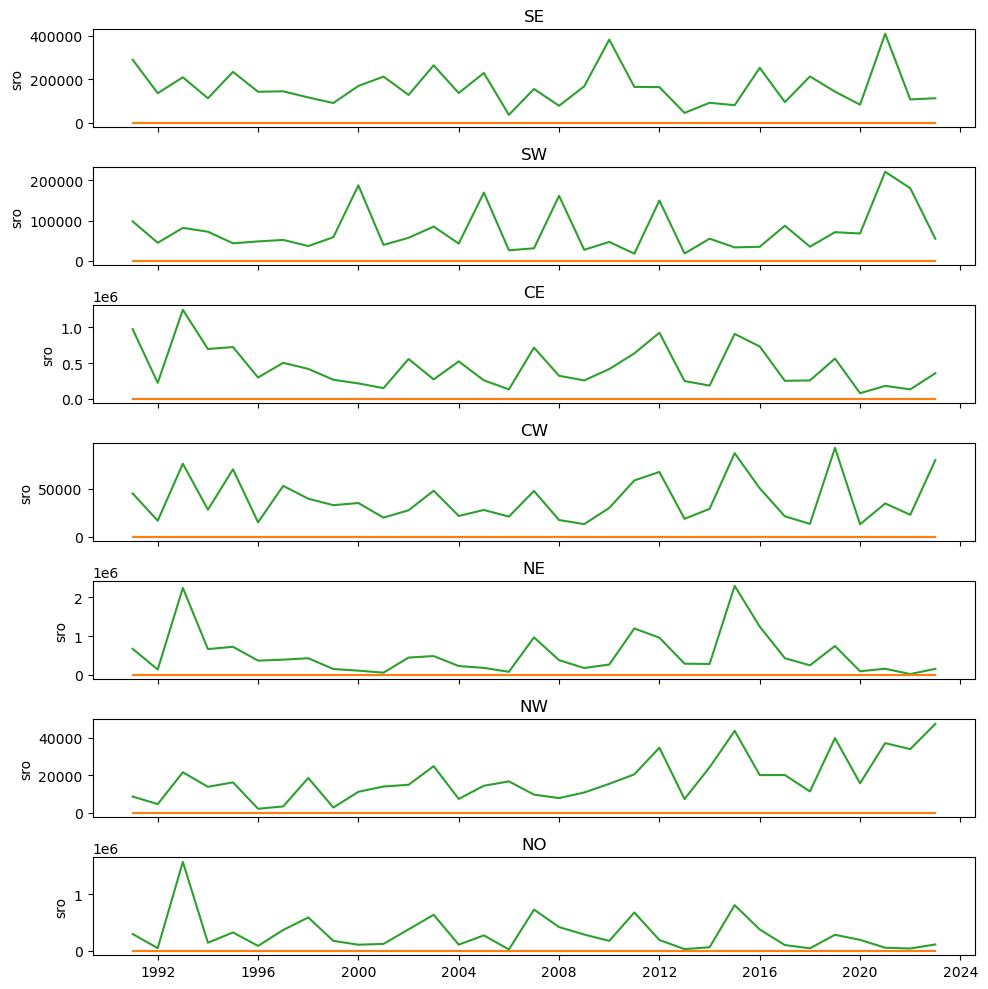

In [128]:
fig, axs = plt.subplots(7,1, figsize=(10,10), sharex=True, sharey=False)

for i in range(1,8):
    ds_tundra_sum_YY['sro'].sel(section_numbers_adjusted=i).plot(ax=axs[i-1], color='tab:green')
    ds_GIC_sum_YY['sro'].sel(section_numbers_adjusted=i).plot(ax=axs[i-1], color='plum')
    ds_GrIS_sum_YY['sro'].sel(section_numbers_adjusted=i).plot(ax=axs[i-1], color='tab:orange')
    axs[i-1].set_title(dict_sections[i])
    # axs[i-1].set_ylabel('Surface runoff (mm)')
    axs[i-1].set_xlabel('')

plt.tight_layout()

In [4]:
dsCARRA = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.CARRA.west_domain.1991-2023.1km.YY.nc")
dsCARRA = dsCARRA.where(dsCARRA>0, 0)

In [5]:
dsRACMO = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/runoff_yearlyS_FGRN055_BN_RACMO2.3p2_ERA5_3h_1940_FGRN055_1940_2022_1km.nc")


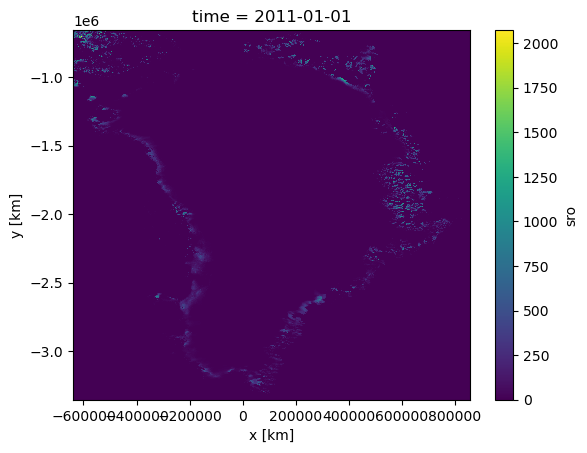

In [6]:
dsCARRA.sel(time='2011').squeeze()['sro'].plot()

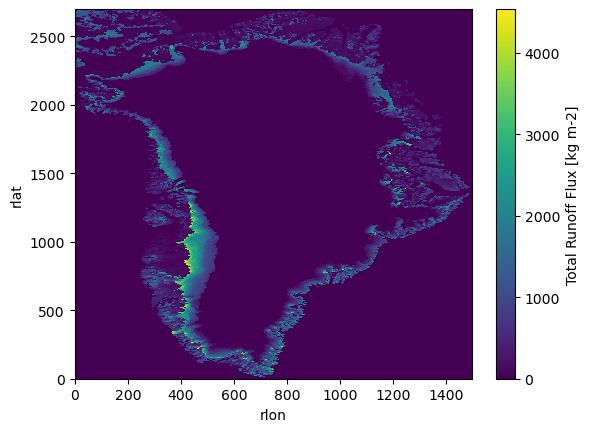

In [7]:
dsRACMO.sel(time='2011').squeeze().reset_coords(drop=True)['runoff'].plot()

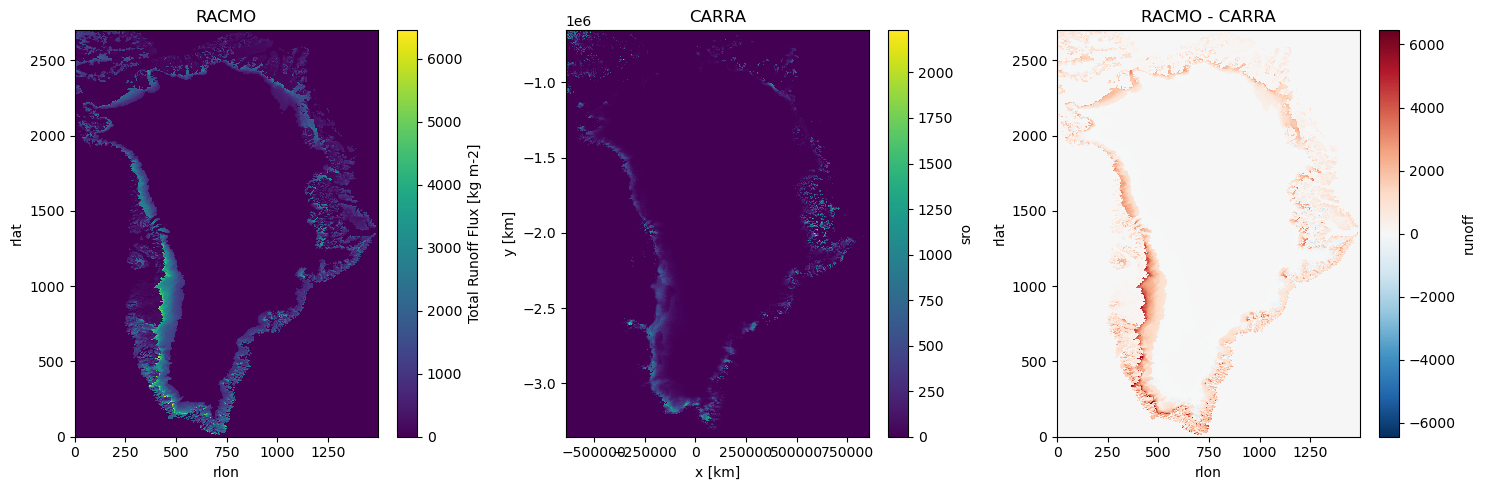

In [13]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
year = '2012'
dsCARRA.sel(time=year).squeeze()['sro'].plot(ax=axs[1])
dsRACMO.sel(time=year).squeeze().reset_coords(drop=True)['runoff'].plot(ax=axs[0])
# difference RACMO - CARRA
(dsRACMO.sel(time=year).squeeze().reset_coords(drop=True)['runoff'] - dsCARRA.sel(time=year).squeeze()['sro'].values).plot(ax=axs[2])
# ax titles
axs[1].set_title('CARRA')
axs[0].set_title('RACMO')
axs[2].set_title('RACMO - CARRA')
plt.tight_layout()


In [ ]:
ds_sections = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24_copy_copy.nc")
ds_sections

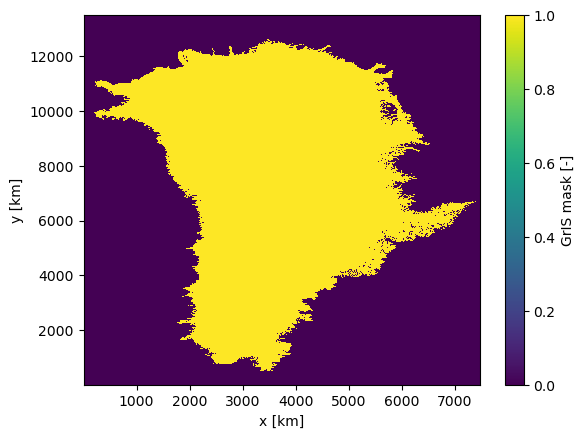

In [182]:
ds_masks1['GrIS'].plot()

In [14]:
dsGrIS = dsCARRA.where(ds_masks1['GrIS'].values>0)#
# make sure all values are >0
dsGrIS.sel(time='2012')['sro'].plot()

NameError: name 'ds_masks1' is not defined

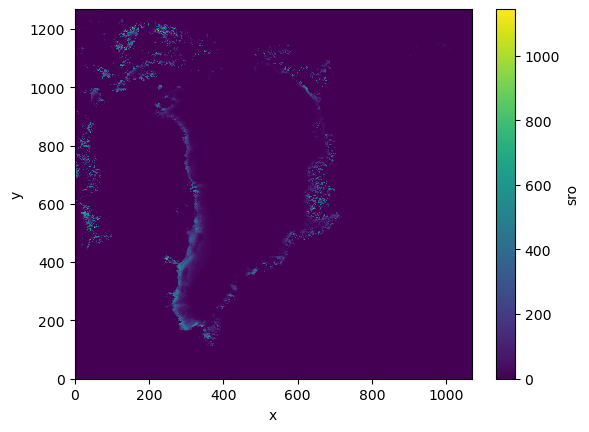

In [17]:
dsCARRA_basic = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/3-hourly/surface_runoff.CARRA.west_domain.forecast.24h.2012.7.grib")
dsCARRA_basic_1step = dsCARRA_basic.sel(step=pd.to_timedelta('1 days 00:00:00')).sum(dim='time').reset_coords(drop=True)
dsCARRA_basic_1step['sro'].plot()

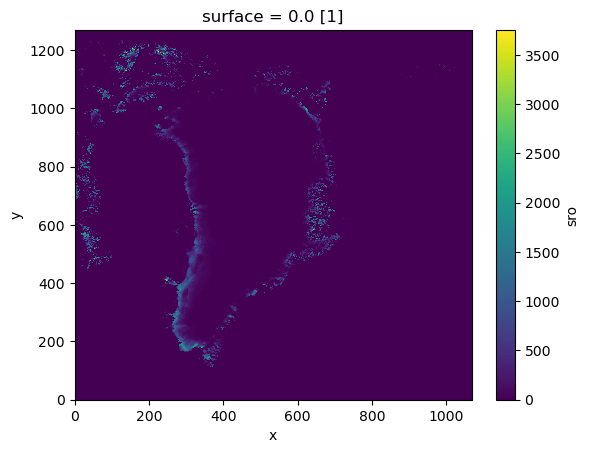

In [19]:
dsCARRA_basic.sum(dim='step').sum(dim='time')['sro'].plot()

In [137]:
dsGIC = ds.where(ds_masks1['GIC'].values>0)#

In [157]:
file = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.GIC.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin.nc"
ds_GIC_sum_YY = xr.open_dataset(file)

fRunoffGrIS_CARRA_YY = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.GrIS.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin.nc"
fRunoffGIC_CARRA_YY = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.GIC.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin_copy.nc" 
fRunoffTundra_CARRA_YY = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.Tundra.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin_copy.nc"

dsRunoffGrIS_CARRA_YY = xr.open_dataset(fRunoffGrIS_CARRA_YY)
dsRunoffGIC_CARRA_YY = xr.open_dataset(fRunoffGIC_CARRA_YY)
dsRunoffTundra_CARRA_YY = xr.open_dataset(fRunoffTundra_CARRA_YY)

OSError: [Errno -101] NetCDF: HDF error: '/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/surface_runoff.GrIS.CARRA.west_domain.1991-2023.1km.YY.sum_per_basin.nc'

In [154]:
dsRunoffGrIS_CARRA_YY['sro'].sum(dim=['section_numbers_adjusted']).plot()

NameError: name 'dsRunoffGrIS_CARRA_YY' is not defined

In [144]:

dsGIC_sections = dsGIC.groupby(ds_sections['section_numbers_adjusted']).sum()

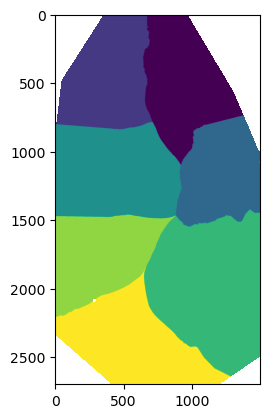

In [140]:
dsGIC_sections['sro'].plot(hue='section_numbers_adjusted')

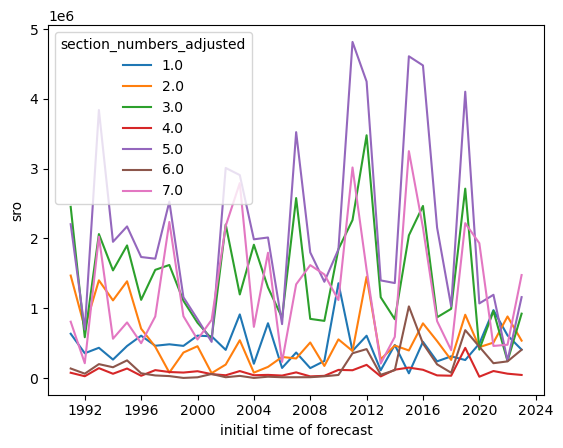

In [148]:
dsGIC_sections['sro'].plot(hue='section_numbers_adjusted')